In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.rcParams['font.sans-serif'] = [u'simHei']  # 指定中文字体为黑体，防止乱码
plt.rcParams['axes.unicode_minus'] = False     # 使用ASCII字符，保证显示正确

In [22]:
# 修正文件路径和编码的分开
df = pd.read_csv(r'C:\Users\Administrator\Desktop\AI技术基础作业\sh_air_quality_1.csv', encoding='gbk')
df.head()  

,质量等级,AQI指数,PM2.5,PM10,So2,No2,Co,O3
0,轻度污染,111,83,93,9,87,1.03,23
1,良,81,60,63,7,41,0.84,58
2,优,27,14,27,7,33,0.59,53
3,优,50,34,46,8,53,0.71,46
4,良,55,36,47,7,62,0.68,31


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   质量等级    353 non-null    object 
 1   AQI指数   353 non-null    int64  
 2   PM2.5   353 non-null    int64  
 3   PM10    353 non-null    int64  
 4   So2     353 non-null    int64  
 5   No2     353 non-null    int64  
 6   Co      353 non-null    float64
 7   O3      353 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 22.2+ KB


In [24]:
# 查看缺失值
df.isnull().sum()

质量等级     0
AQI指数    0
PM2.5    0
PM10     0
So2      0
No2      0
Co       0
O3       0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# 将空气质量等级转换为数值
label_encoder = LabelEncoder()
df['质量等级'] = label_encoder.fit_transform(df['质量等级'])

# 特征和标签
X = df[['AQI指数', 'PM2.5', 'PM10', 'So2', 'No2', 'Co', 'O3']]
y = df['质量等级']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择最佳的k值
k_values = range(1, 21)  # k值范围
mean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5折交叉验证
    mean_accuracies.append(scores.mean())

# 找到最佳k值
best_k = k_values[np.argmax(mean_accuracies)]
print(f'最佳k值: {best_k}')

# 使用最佳k值训练kNN分类器
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# 在测试集上测试分类器的准确率
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'测试集准确率: {accuracy:.2f}')

最佳k值: 3
测试集准确率: 0.90


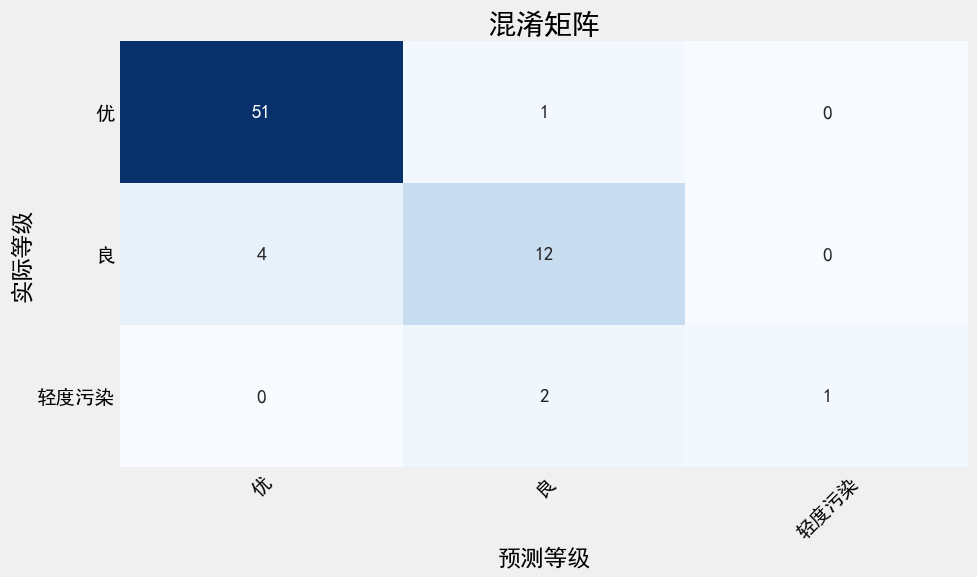

In [28]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建一个 DataFrame 用于可视化
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# 绘制热力图
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)

# 添加标题和标签
plt.title('混淆矩阵')
plt.xlabel('预测等级')
plt.ylabel('实际等级')
plt.xticks(rotation=45)  # 旋转x轴标签以便于阅读
plt.yticks(rotation=0)    # 旋转y轴标签以便于阅读
plt.tight_layout()  # 自动调整布局
plt.show()